# Gender Classification Using Sklearn

In [1]:
#importing liraries

In [2]:
import pandas as pd
import sklearn
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("L:\Gender classification\gender_classification_v7.csv")

In [6]:
data.head(20)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [7]:
#checking for null values
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

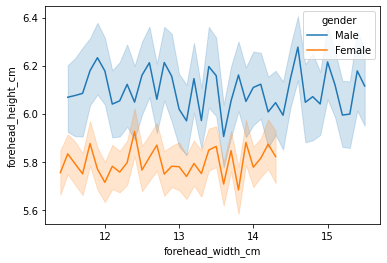

In [9]:
#visualising forehead length data
sns.lineplot(data['forehead_width_cm'],data['forehead_height_cm'], hue=data["gender"])


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nose_long', ylabel='nose_wide'>

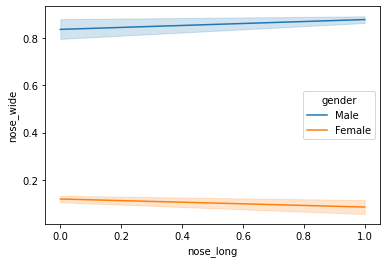

In [10]:
#visualising nose length data
sns.lineplot(data['nose_long'],data['nose_wide'], hue=data["gender"])

In [35]:
#encoding data
twogender = {'Female':0, 'Male':1}
data['gender'] = data['gender'].map(twogender)


In [37]:
data.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [38]:
X = data.drop('gender', axis=1)
y = data['gender']

In [39]:
#splitting data for testing and traing process
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [40]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


# trying diffrent methods to find best accuracy

In [41]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [42]:
#Decision tree-classifier
dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)
dt_acc = accuracy_score(y_val, dt_pred)
print('Accuracy of Decision Tree is: {:.2f}%'.format(dt_acc*100))

Accuracy of Decision Tree is: 96.87%


In [44]:
#randomforestClassifier 
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc*100))

Accuracy of Random Forest is: 97.53%


In [48]:
#logistic regression
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))

Accuracy of Logistic Regression is: 97.27%


In [46]:
#k nearest neighbour
knn = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 7}

In [47]:
kn = KNeighborsClassifier(n_neighbors=8)

kn.fit(X_train, y_train)
kn_pred = kn.predict(X_val)
kn_acc = accuracy_score(y_val, kn_pred)
print('Accuracy of KNeighbors is: {:.2f}%'.format(kn_acc*100))

Accuracy of KNeighbors is: 97.20%


# Accuracy of Decision Tree is: 96.87%



# Accuracy of Random Forest is: 97.53%

# Accuracy of Logistic Regression is: 97.27%



# Accuracy of KNeighbors is: 97.20%

In [49]:
#so random forest gave best results